
---

## 🧠 What is Logistic Regression?

> It’s a machine learning algorithm used to **classify data** into **categories**, usually **Yes/No**, **Pass/Fail**, **0/1**, etc.

✅ Even though the name says "**regression**", it's used for **classification**.

---

## 📘 Real-World Automotive Example

You want to build a model that predicts:

> Will an **ECU fail** in the next month?
> Based on sensor logs like temperature, error count, uptime, etc.

Output:

* ✅ Yes → 1
* ❌ No → 0

---

## 🧮 Why Can’t We Use Linear Regression?

Let’s say linear regression gives output like this:

| Input | Linear Prediction |
| ----- | ----------------- |
| A     | 1.2 ❌             |
| B     | -0.4 ❌            |
| C     | 0.9 ✅ (maybe)     |
| D     | 2.5 ❌             |

➡️ But we want outputs **strictly between 0 and 1** (like probabilities).

---

## 🧩 Enter the **Sigmoid Function**

Logistic Regression uses a **Sigmoid (S-shaped) function** to convert linear output into probability:

$$
\text{Sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$

Where:

* $z = w_1x_1 + w_2x_2 + \dots + b$
* Output: always between 0 and 1 ✅

---

## 📈 How It Works (Step-by-Step):

1. **Calculate weighted sum** (like linear regression):

   $$
   z = w_1x_1 + w_2x_2 + \dots + b
   $$

2. **Apply sigmoid function** to convert to probability:

   $$
   \hat{y} = \frac{1}{1 + e^{-z}}
   $$

3. **Threshold at 0.5** to get a binary prediction:

   $$
   \hat{y} \geq 0.5 \Rightarrow 1 \text{ (Yes)}, \quad \hat{y} < 0.5 \Rightarrow 0 \text{ (No)}
   $$

---

## 🧒 Real-Life Analogy: Light Switch with a Dimmer

* Linear Regression is like a dimmer — can give any brightness level.
* Logistic Regression is like a **switch** — gives only **ON or OFF** based on threshold.

---

## 🔧 When to Use Logistic Regression

| Scenario (Automotive)               | Use Logistic Regression? |
| ----------------------------------- | ------------------------ |
| Predict if DTC is critical (Yes/No) | ✅ Yes                    |
| Predict battery charge in volts     | ❌ No (Use regression)    |
| Classify ECU as Healthy/Faulty      | ✅ Yes                    |
| Predict number of CAN packets       | ❌ No (Use regression)    |

---



Let’s now understand the **Loss Function** used in **Logistic Regression** — step by step, from a beginner’s perspective.

---

## 🧠 Why Do We Need a Special Loss Function?

In **Linear Regression**, we use:

$$
\text{Loss} = (y - \hat{y})^2
$$

But in **Logistic Regression**:

* $\hat{y}$ is a **probability** between 0 and 1 (from the sigmoid)
* Output $y$ is either **0 or 1**
* Squared loss doesn’t work well for probabilities — it leads to **non-convex curves**, making optimization **unstable**

---

## 🎯 Solution: Use **Log Loss** (aka Binary Cross Entropy)

It penalizes wrong predictions **more strongly** and handles probabilities properly.

---

## 🧮 Log Loss Function (Binary Classification)

$$
\text{Loss} = -[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) ]
$$

Where:

* $y$ = actual label (0 or 1)
* $\hat{y}$ = predicted probability (from sigmoid)

---

### 🔍 How It Works:

| Case    | Meaning      | What Happens                                                 |
| ------- | ------------ | ------------------------------------------------------------ |
| $y = 1$ | Actual = Yes | Loss = $-\log(\hat{y})$ → low if $\hat{y}$ is close to 1     |
| $y = 0$ | Actual = No  | Loss = $-\log(1 - \hat{y})$ → low if $\hat{y}$ is close to 0 |

🧠 So:

* If your model is **confident and correct** → low loss ✅
* If your model is **confident but wrong** → huge loss ❌

---

### 🧒 Real-Life Analogy

Imagine your model is a student predicting if a car's brake ECU will fail:

* If the student says "Yes, with 99% confidence" and it's true → 👍 Good (small penalty)
* If the student says "No, with 99% confidence" but it **fails** → 😨 Very wrong! Big penalty!

---

## 📈 Graph of Log Loss

* Looks like a **very steep slope** when the prediction is **confident and wrong**
* Gently flattens when predictions are **close to correct**

---

## ✅ Summary

| Term     | Meaning                                         |
| -------- | ----------------------------------------------- |
| Log Loss | Penalizes wrong predictions based on confidence |
| Goal     | Minimize log loss to make better predictions    |
| Used in  | Logistic regression, binary classification      |

---




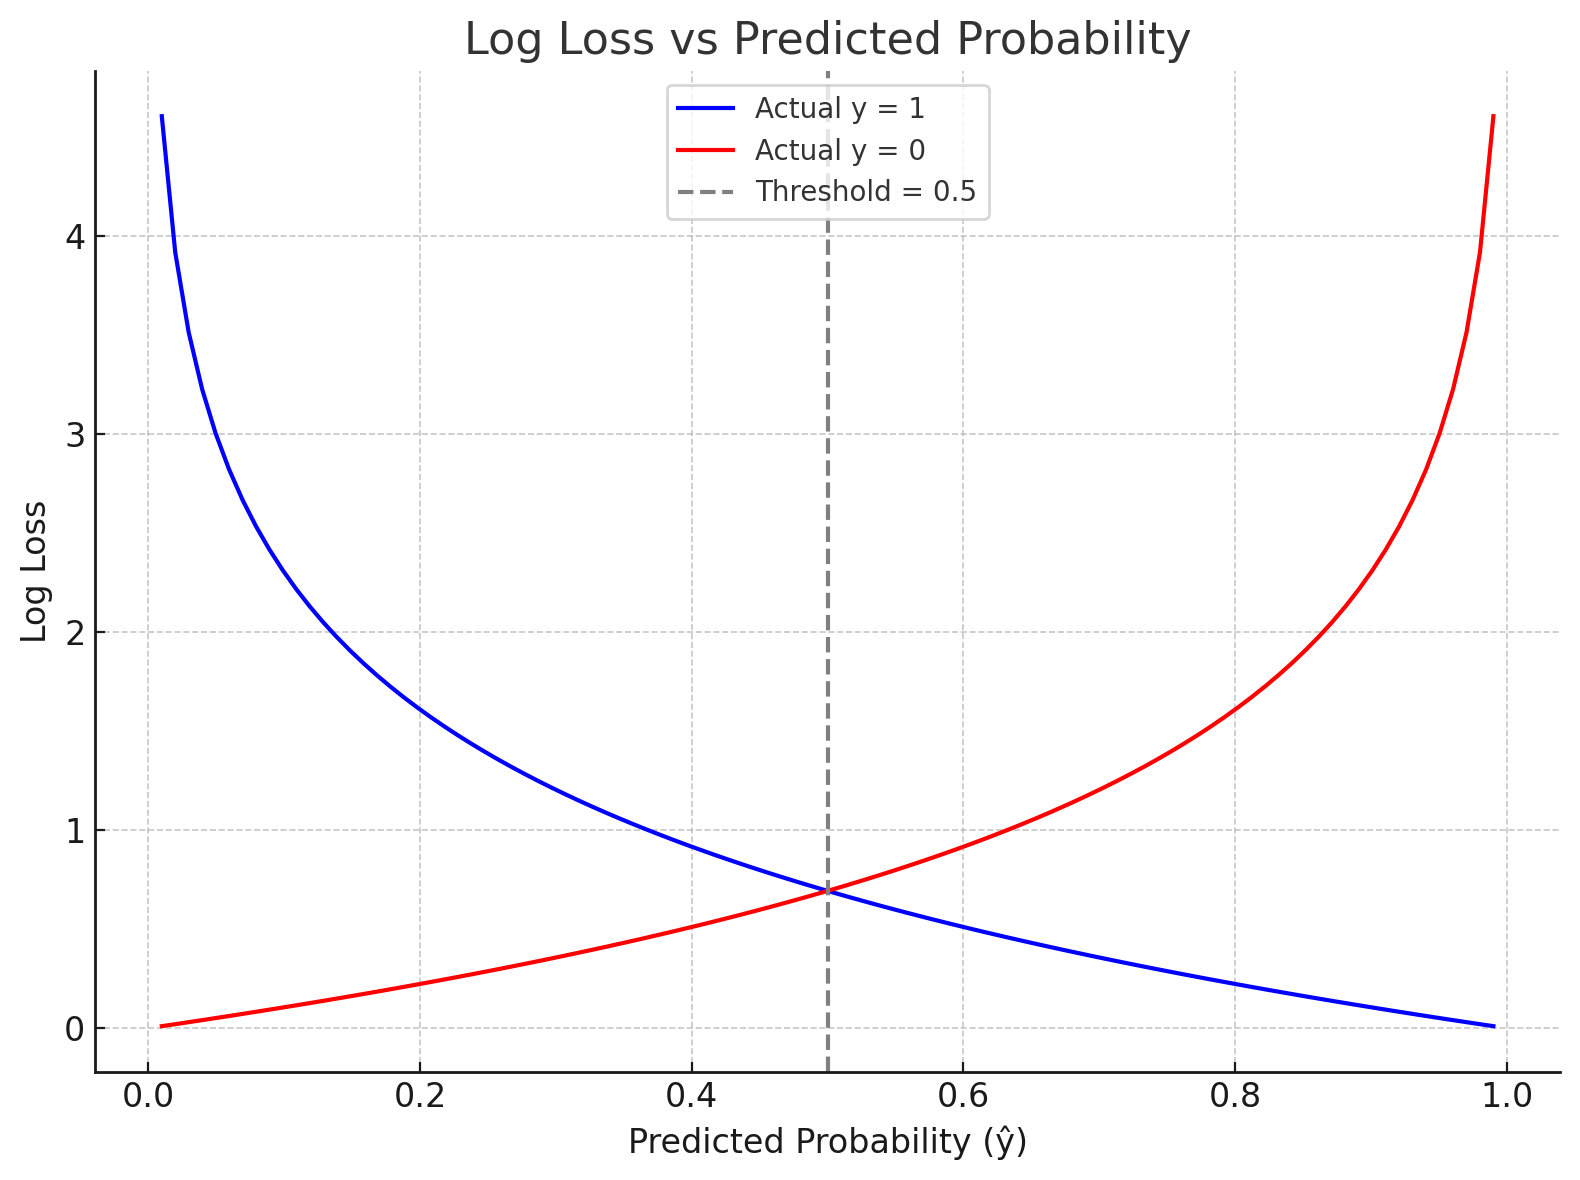

Here’s the plot showing how **log loss increases sharply** when your model is **confident but wrong**:

* 🔵 **Blue curve**: Loss when actual = 1 → Loss becomes huge as prediction → 0
* 🔴 **Red curve**: Loss when actual = 0 → Loss becomes huge as prediction → 1

📌 Interpretation:

* When the model is **correct and confident** → Loss is near 0
* When the model is **wrong and confident** → Loss shoots up steeply

Would you like to now move to **thresholding and decision rule (0.5 rule)** in logistic regression?


# **Thresholding step** in **Logistic Regression**

## 🧠 Recap: What Does Logistic Regression Output?

Logistic regression doesn’t directly say **“Yes” or “No”**.

Instead, it outputs a **probability**:

$$
\hat{y} = \frac{1}{1 + e^{-z}} \quad \text{where } z = w_1x_1 + w_2x_2 + \dots + b
$$

For example:

| Input Data | Predicted Probability |
| ---------- | --------------------- |
| ECU log A  | 0.91                  |
| ECU log B  | 0.47                  |
| ECU log C  | 0.68                  |

---

## ✅ Step: Apply a **Threshold (usually 0.5)**

$$
\hat{y} \geq 0.5 \Rightarrow \text{Class = 1 (Yes)}  
$$

$$
\hat{y} < 0.5 \Rightarrow \text{Class = 0 (No)}
$$

So:

* **0.91 → 1** ✅
* **0.47 → 0** ❌
* **0.68 → 1** ✅

---

## ⚙️ Why 0.5?

Because:

* The **sigmoid function** is symmetric around 0.5
* It acts like the **midpoint** between low and high confidence

But in real-world situations:

* You can **change the threshold** based on your use case.

---

## 🚦 Real-World Use Case (Automotive Safety)

Imagine you're predicting if a **brake ECU will fail**:

| Threshold | Use Case                                                          |
| --------- | ----------------------------------------------------------------- |
| 0.5       | Balanced risk vs alarm                                            |
| 🔼 0.7    | Use if you want **very high confidence before flagging an error** |
| 🔽 0.3    | Use if you want to **catch early warnings, even false alarms**    |

---

## 📌 Summary:

* Logistic Regression gives **probabilities**
* Threshold (usually 0.5) converts probability into **0 or 1**
* You can adjust threshold to balance between **false positives** and **false negatives**

---

Would you now like to:

* See a **visual diagram** of thresholding?
* Or go ahead with **Confusion Matrix** and **evaluation metrics**?
